# Forgatások, állapotpreparálás

Ebben a notebook-ban az alábbi függvényekre lesz szükségünk:

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from math import pi, sqrt, cos, sin
from qiskit.visualization import plot_bloch_multivector, plot_histogram

## Z-kapu

A Z-kapu hatása:

$|0\rangle \rightarrow |0\rangle$

$|1\rangle \rightarrow -|1\rangle$

**A bázisállapotokat tehát nem változtatja meg** (mivel a globális fázis nem számít).

#### Állítsunk össze egy egyszerű áramkört a Z-kapuval és ábrázoljuk a hatását a Bloch-gömbön különböző bemenetek esetén!

[0.8314696123025452, 0.5555702330196022]


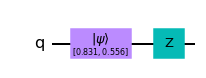

In [2]:
#Adjunk meg bemenetnek egy tetszőleges kezdő kvantumállapot-vektort!
#Használjuk az előzőekben mutatott paraméterezést, azaz legyen a=cos(theta/2), b=sin(theta/2) 

theta=3*pi/8

a=cos(theta/2)
b=sin(theta/2)

#Legyen a kezdeti állapot az "a" és "b" amplitúdókkal adott
input_state = [a,b] 
print(input_state)

# Hozzuk létre az egy-qubites áramkört
qc = QuantumCircuit(1)

# A kezdeti állapotot állítsuk be az általunk fent megadottra
qc.initialize(input_state, 0)

# Adjuk hozzá a Z-kaput és rajzoljuk ki az áramkört
qc.z(0)
qc.draw(output = 'mpl')

In [3]:
# Futtassuk le az áramkört a megfelelő szimulátoron és írassuk ki az eredményt
job=execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
output_state = job.result().get_statevector(qc)
print(output_state.real)

[ 0.83146961 -0.55557023]


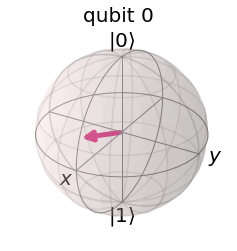

In [4]:
# Ábrázoljuk a kezdeti állapotot a Bloch-gömbön
plot_bloch_multivector(input_state)

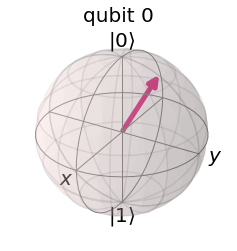

In [5]:
# Ábrázoljuk a végállapotot
plot_bloch_multivector(output_state)

#### Azt tapasztaljuk, hogy a Z-kapu z-tengely körül forgat $\pi$-vel.

## X-kapu

Az X-kapu hatása:

$|0\rangle \rightarrow |1\rangle$

$|1\rangle \rightarrow |0\rangle$

Az X-kapu tehát az egyik bázisállapotot a másikba transzformálja.

#### Állítsunk össze egy egyszerű áramkört az X-kapuval és ábrázoljuk a hatását a Bloch-gömbön különböző bemenetekre! Mely állapotokat hagyja fixen az X-kapu?

Az előző kódot is használhatjuk, ha átírjuk benne a kaput Z-ről X-re.

[0.8314696123025452, 0.5555702330196022]


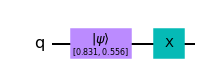

In [6]:
theta=3*pi/8

a=cos(theta/2)
b=sin(theta/2)

input_state = [a,b] 
print(input_state)

qc = QuantumCircuit(1)

qc.initialize(input_state, 0)

qc.x(0)
qc.draw(output = 'mpl')

In [7]:
# Futtassuk le az áramkört a megfelelő szimulátoron és írassuk ki az eredményt
job=execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
output_state = job.result().get_statevector(qc)
print(output_state.real)

[0.55557023 0.83146961]


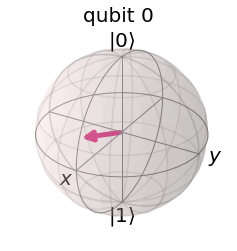

In [8]:
# Ábrázoljuk a kezdeti állapotot a Bloch-gömbön
plot_bloch_multivector(input_state)

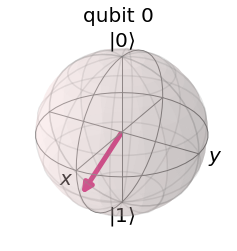

In [9]:
# Ábrázoljuk a végállapotot
plot_bloch_multivector(output_state)

#### Az X-kapu tehát az x-tengely körül forgat $\pi$-vel. 
#### A két állapot, amelyet fixen hagy a $|+\rangle$ és a $|-\rangle$.

## Hadamard-kapu

A Hadamard-kapu hatása:

$|0\rangle \rightarrow \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)=|+\rangle$

$|1\rangle \rightarrow \frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)=|-\rangle$

Ugyanakkor az is igaz, hogy:

$|+\rangle \rightarrow |0\rangle$

$|-\rangle \rightarrow |1\rangle$

#### Állítsunk össze egy egyszerű áramkört a H-kapuval és ábrázoljuk a hatását a Bloch-gömbön!

A kezdeti állapot amplitúdóinak változtatásával próbáljunk rájönni, hogy a Hadamard-kapu melyik tengely körüli $\pi$-vel való forgatásnak felel meg.

Az eddigi kódot is használhatjuk, ha átírjuk benne a kaput H-ra.

[0.7071067811865476, 0.7071067811865476]


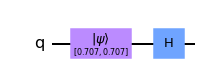

In [10]:
theta=pi/2

a=cos(theta/2)
b=sin(theta/2)

input_state = [a,b]

qc = QuantumCircuit(1)

qc.initialize(input_state, 0)

qc.h(0)

print(input_state)
qc.draw(output = 'mpl')

In [11]:
job=execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
output_state = job.result().get_statevector(qc)
print(output_state.real)

[1. 0.]


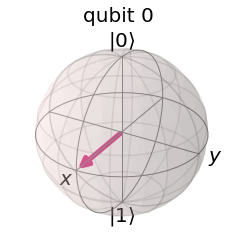

In [12]:
plot_bloch_multivector(input_state)

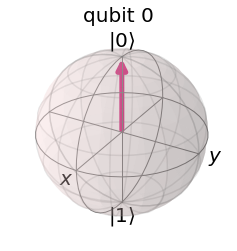

In [13]:
plot_bloch_multivector(output_state)

#### A Hadamard-kapu a $\theta=\frac{\pi}{4}$ irányú tengely körül forgat $\pi$-vel.

## Az RY($\theta$)-kapu

Általánosan, az RY-kapu hatása a következőképpen írható:

$|0\rangle \rightarrow \cos\frac{\theta}{2}|0\rangle - \sin\frac{\theta}{2}|1\rangle $

$|1\rangle \rightarrow \sin\frac{\theta}{2}|0\rangle + \cos\frac{\theta}{2}|1\rangle $

#### Induljunk ki a bázisállapotokból és nézzük meg az RY($\theta$)-kapu hatását különböző $\theta$ értékekre!

Próbáljuk ki rendre a $\theta=\frac{\pi}{4}, \frac{\pi}{2}, \pi, \frac{3\pi}{2}, 2\pi$ értékeket.

Megjegyzés: Most a $\theta$ nem a bemenő állapotot paraméterezi, hanem a kvantumos kaput. Használhatjuk az előző kódunkat, de a bemenő állapotot most állítsuk be valamelyik bázisállapotra, a $\theta$ pedig legyen a kapu paramétere.

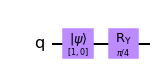

In [14]:
a=1
b=0

#a=0
#b=1

input_state = [a,b]

qc = QuantumCircuit(1)

qc.initialize(input_state, 0)

theta=pi/4
#theta=pi/2
#theta=pi
#theta=3*pi/2
#theta=2*pi

qc.ry(theta,0)

qc.draw(output = 'mpl')

In [15]:
job=execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
output_state = job.result().get_statevector(qc)
print(output_state.real)

[0.92387953 0.38268343]


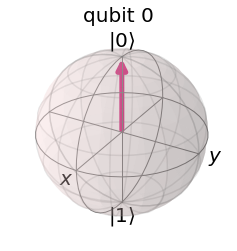

In [16]:
plot_bloch_multivector(input_state)

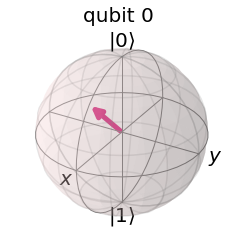

In [17]:
plot_bloch_multivector(output_state)

#### Az RY($\theta$)-kapu tehát az y-tengely körül forgat $\theta$ szöggel.

### Állapotpreparálás

A kvantumszámítógépekben minden qubit kezdetben a $|0\rangle$ kvantumállapotban kerül inicializálásra. Ha ettől eltérő állapotra szeretnénk lefuttatni egy áramkört, akkor egy tetszőleges bemenő állapotot pl. az RY-kapuval állíthatunk be. 

(Még általánosabb bemenethez természetesen más forgatásokra is szükségünk van, de ezeket itt most nem tekintjük.)